# Imports:

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist, euclidean


from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from SampleLists.SampleFileFunctions import *
from PhenotypicData.PhenotypeGenerationFunctions import *
from CardioProject.CardioFunctions import *
from PredictionPipeline.PredictionFunctions import *
from TCR_feature_generation.SubsamplingFunctions import *

import os
from Utils import cacheOnDisk
from queue.qp import qp,fakeqp
from addloglevels import sethandlers

#ML imports:
from xgboost import XGBClassifier,XGBRegressor
import lightgbm as lgb
from collections import OrderedDict
from sklearn.model_selection import GroupKFold,StratifiedKFold, KFold
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression
import shap
from sklearn import metrics, preprocessing
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel,SelectKBest,chi2,mutual_info_classif,f_classif
from sklearn.naive_bayes import GaussianNB

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

posterFolder='%s/Presentations and Manuscripts/ImmunoRepertoire conference - Paris2018/Poster/new' %MyPath

done1
stop
stop
done1
stop
done
done
done
done
stop
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


end of function!!!


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

'21102018'

# Figure 1 - phenptype-feature associations

('original X shape is:', (530, 671))
       AA count_0  AA count_1  AA count_T     D01_0
BD406       190.0      8017.0      8207.0  0.381305
BD228       357.0     12365.0     12722.0  0.383422
BD714       208.0     10560.0     10768.0  0.459386
BD808       359.0     19513.0     19872.0  0.508576
('X_ageCorr_PNP530shape is:', (530, 671))
          D01_0  D01_J01-01_0  D01_J01-01_1  D01_J01-01_T
BD406  0.381305      0.039677      0.056967      0.053027
BD228  0.383422      0.027358      0.048807      0.043863
BD714  0.459386      0.038225      0.059772      0.055846
BD808  0.508576      0.052946      0.072933      0.069285
('X_ageGenderCorr_PNP530 is:', (530, 671))
          D01_0  D01_J01-03_0  D01_J01-03_1  D01_J01-03_T
BD406  0.381305           0.0      0.000000      0.000000
BD228  0.383422           0.0      0.000122      0.000094
BD714  0.459386           0.0      0.000000      0.000000
BD808  0.508576           0.0      0.000000      0.000000
('phenotypeDF_PNP530 shape is:', (530,

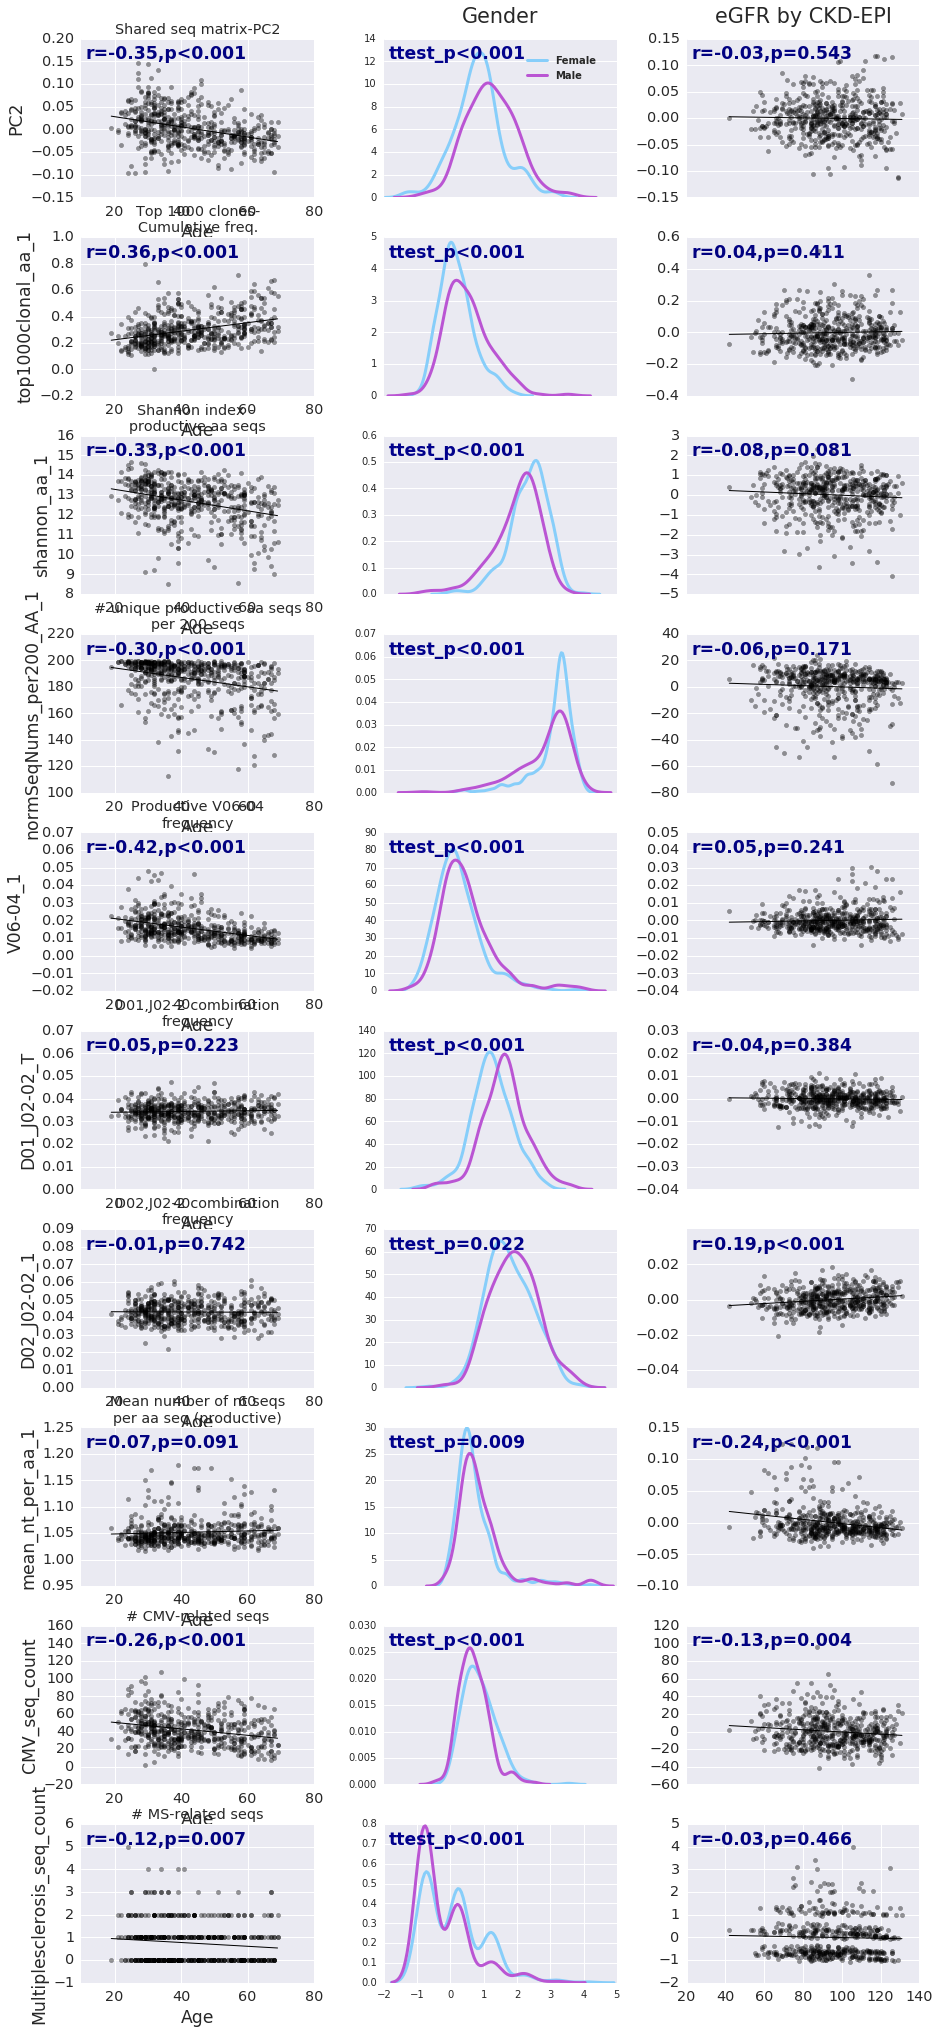

In [6]:
fig1,axes1=plt.subplots(nrows=10,ncols=3, figsize=(12,30))

### get data:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
    
f1='%s/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10_.dat' %MyPath
originalX_PNP530=pd.read_pickle(f1).loc[PNP530,:]
originalX_PNP530.head()
print ('original X shape is:', originalX_PNP530.shape)
print originalX_PNP530.iloc[:4,:4]

f2='%s/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10__AgeCorrRes.dat' %MyPath
X_ageCorr_PNP530=pd.read_pickle(f2).loc[PNP530,:]
print ('X_ageCorr_PNP530shape is:', X_ageCorr_PNP530.shape)
print X_ageCorr_PNP530.iloc[:4,:4]

f3='%s/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10__AgeGenderCorr.dat' %MyPath
X_ageGenderCorr_PNP530=pd.read_pickle(f3).loc[PNP530,:]
print ('X_ageGenderCorr_PNP530 is:', X_ageGenderCorr_PNP530.shape)
print X_ageGenderCorr_PNP530.iloc[:4,:4]

#load phenotypeDF:
f4='%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/PNP530Cardio126_AllInfo_withDummies.xlsx' %MyPath
phenotypeDF_PNP530=pd.read_excel(f4).set_index('BD').loc[PNP530,:]
print ('phenotypeDF_PNP530 shape is:', phenotypeDF_PNP530.shape)
print phenotypeDF_PNP530.iloc[:4,:4]


featureList=['PC2','top1000clonal_aa_1','shannon_aa_1','normSeqNums_per200_AA_1',
             'V06-04_1','D01_J02-02_T','D02_J02-02_1','mean_nt_per_aa_1',
            'CMV_seq_count','Multiplesclerosis_seq_count']
featureNameList=['Shared seq matrix-PC2','Top 1000 clones-\nCumulative freq.',
                 'Shannon index - \nproductive aa seqs','# unique productive aa seqs\nper 200 seqs',
                'Productive V06-04\nfrequency','D01,J02-2 combination\nfrequency','D02,J02-2 combination\nfrequency',
                 'Mean number of nt seqs\nper aa seq (productive)',
                '# CMV-related seqs','# MS-related seqs']

phenList=['Age','Gender_Male','eGFR by CKD-EPI']


#plot correlations with age:
print 'plotting scatter plot for ageXfeature'
for k,feature in enumerate(featureList):
    ax=axes1[k,0]
    featureDF=originalX_PNP530
    data1=phenotypeDF_PNP530['Age'].tolist()
    data1name='Age'
    data2=featureDF[feature].tolist()
    data2name=feature
    ax, nsamples,r,p,text=plot_corr(data1,data2,data1name,data2name,ax,color='black',alpha=0.4)
    ax.set_ylabel(featureNameList[k],fontsize='large')
    ax.set_xlabel('')
    if k==0:
        plt.text(0.5, 1.1, 'Age',
        horizontalalignment='center',
        fontsize='xx-large',
        transform = ax.transAxes)
    if k!=9:
        ax.get_xaxis().set_ticks([])
    text.remove()
    if p<0.001:
        p='<0.001'
    else:
        p='=%s' %round(p,3)
    ax.annotate("r=%.2f,p%s" %(r,p),  xy=(0.02, 0.96), xycoords='axes fraction', fontsize='x-large',
        horizontalalignment='left', verticalalignment='top',color='navy',fontweight='bold')
    
    
#plot histograms for Gender_Male and :
print 'plotting histograms plot for GenderXfeature'
for k,feature in enumerate(featureList):
    ax=axes1[k,1]
    featureDF=X_ageCorr_PNP530
    try:
        featureData=pd.DataFrame(featureDF[feature])
    except:
        try:
            featureData=pd.DataFrame(featureDF[feature+'_AgeCorrRes']) 
        except:
            print 'couldnt find feature data'
    featureName=featureData.columns[0]
                
    data=pd.merge(featureData,pd.DataFrame(phenotypeDF_PNP530['Gender']),how='inner',
                  left_index=True,right_index=True)
    groups=data.groupby('Gender') #group the df by the phenotype cateogries
    dataList=[] #generate datalist constitutes of tuples, each tuple contain a category name and its relevent feature data
    print '-groups- length is %s' %len(groups)
    for name,group in groups:
        tupList=[]
        tupList.append(name)
        groupData=[x for x in group[featureName].tolist() if not np.isnan(x)]
        tupList.append(groupData)
        tup=tuple(tupList)
        dataList.append(tup)

    title=None
    ax,ks_p_cohort1_cohort2,t_p_cohort1_cohort2,p_Anov,filename=plotHistComprison(dataList,ax,title,
                                                showLegend=True,nBins=10,toAnnotate=False,alpha=0.5,
                                                    plotType='kde')
    if t_p_cohort1_cohort2<0.001:
        t_p_cohort1_cohort2='<0.001'
    else:
        t_p_cohort1_cohort2='=%s' %round(t_p_cohort1_cohort2,3)
    
    
    ax.annotate('ttest_p%s' %t_p_cohort1_cohort2,xy=(0.02, 0.96), xycoords='axes fraction', 
    fontsize='x-large', horizontalalignment='left', verticalalignment='top', fontweight='bold',color='darkblue')

    if k!=0: #add legend only for the left-most subplot
        ax.legend('')
    else:
        ax.legend(bbox_to_anchor=(0.95, 0.95), fontsize='large',loc='upper right',prop={'weight':'bold'})
        
    ax.set_ylabel('')
    ax.set_xlabel('')
    if k==0:
        plt.text(0.5, 1.1, 'Gender',
        horizontalalignment='center',
        fontsize='xx-large',
        transform = ax.transAxes)
    if k!=9:
        ax.get_xaxis().set_ticks([])
        
#plot correlations with eGFR by CKD-EPI:
print 'plotting scatter plot for eGFR by CKD-EPIXfeature'
for k,feature in enumerate(featureList):
    print feature
    ax=axes1[k,2]
    featureDF=X_ageGenderCorr_PNP530
    data1=phenotypeDF_PNP530['eGFR by CKD-EPI'].tolist()
    data1name='eGFR by CKD-EPI'
    
    try:
        data3=featureDF[feature]
        
    except:
        try:
            data3=featureDF[feature+'_AgeCorrRes']
        except:
            try:
                data3=featureDF[feature+'_AgeCorrRes_GenderCorrRes']
            except:
                try:
                    data3=featureDF[feature+'_GenderCorrRes']    
                except:
                    print 'couldnt find feature'
                
    featureName=pd.DataFrame(data3).columns[0]
    data3name=featureName
    data3list=data3.tolist()

    ax, nsamples,r,p,text=plot_corr(data1,data3list,data1name,data3name,ax,color='black',alpha=0.4)
    
    ax.set_ylabel('')
    ax.set_xlabel('')
    if k==0:
        plt.text(0.5, 1.1, 'eGFR by CKD-EPI',
        horizontalalignment='center',
        fontsize='xx-large',
        transform = ax.transAxes)
    if k!=9:
        ax.get_xaxis().set_ticks([])
    text.remove()
    if p<0.001:
        p='<0.001'
    else:
        p='=%s' %round(p,3)
    ax.annotate("r=%.2f,p%s" %(r,p),  xy=(0.02, 0.96), xycoords='axes fraction', fontsize='x-large',
        horizontalalignment='left', verticalalignment='top',color='navy',fontweight='bold')
        
        
fig1.subplots_adjust(left=0.02,right=0.99,bottom=0.02, wspace=0.3, hspace=0.25,top=0.92)
plt.show()

figName='1-PNP530-Phenotype-TCR feature interaction'
figFile='%s/%s' %(posterFolder,figName)
fig1.savefig(figFile,dpi=300,bbox_inches='tight')
plt.show()

## VERSION FOR THE PPT

('original X shape is:', (530, 671))
       AA count_0  AA count_1  AA count_T     D01_0
BD406       190.0      8017.0      8207.0  0.381305
BD228       357.0     12365.0     12722.0  0.383422
BD714       208.0     10560.0     10768.0  0.459386
BD808       359.0     19513.0     19872.0  0.508576
('X_ageCorr_PNP530shape is:', (530, 671))
          D01_0  D01_J01-01_0  D01_J01-01_1  D01_J01-01_T
BD406  0.381305      0.039677      0.056967      0.053027
BD228  0.383422      0.027358      0.048807      0.043863
BD714  0.459386      0.038225      0.059772      0.055846
BD808  0.508576      0.052946      0.072933      0.069285
('X_ageGenderCorr_PNP530 is:', (530, 671))
          D01_0  D01_J01-03_0  D01_J01-03_1  D01_J01-03_T
BD406  0.381305           0.0      0.000000      0.000000
BD228  0.383422           0.0      0.000122      0.000094
BD714  0.459386           0.0      0.000000      0.000000
BD808  0.508576           0.0      0.000000      0.000000
('phenotypeDF_PNP530 shape is:', (530,

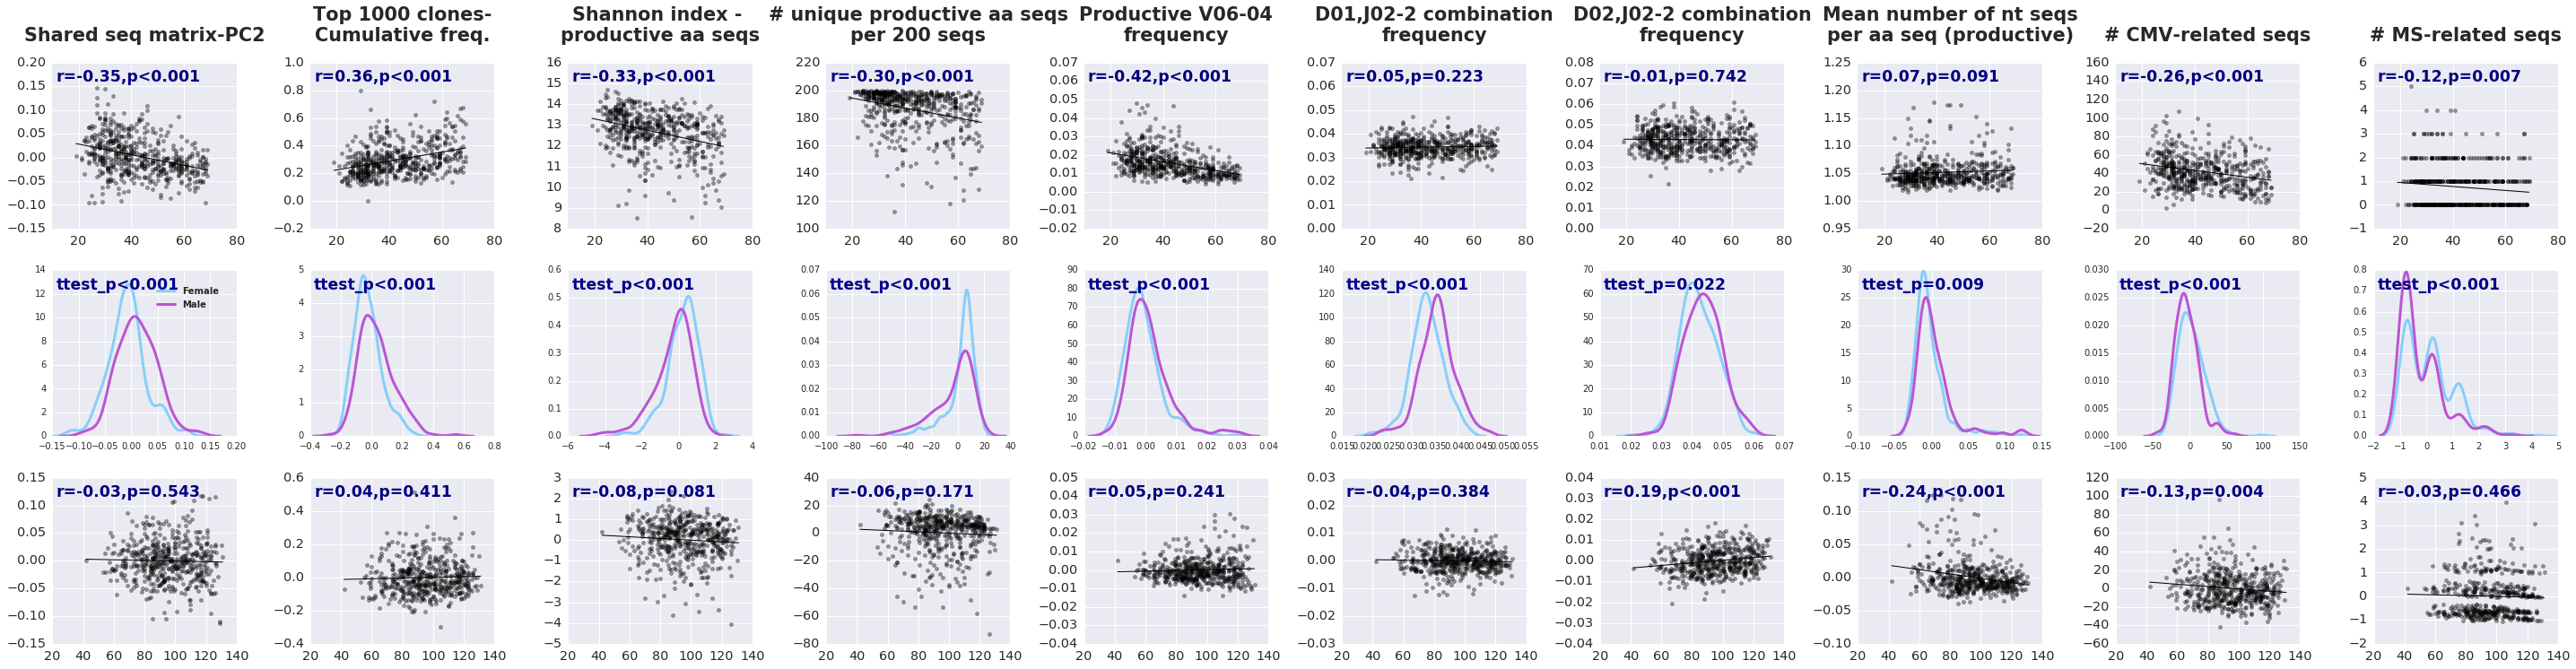

In [10]:
fig1,axes1=plt.subplots(nrows=3,ncols=10, figsize=(40,10))

### get data:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
    
f1='%s/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10_.dat' %MyPath
originalX_PNP530=pd.read_pickle(f1).loc[PNP530,:]
originalX_PNP530.head()
print ('original X shape is:', originalX_PNP530.shape)
print originalX_PNP530.iloc[:4,:4]

f2='%s/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10__AgeCorrRes.dat' %MyPath
X_ageCorr_PNP530=pd.read_pickle(f2).loc[PNP530,:]
print ('X_ageCorr_PNP530shape is:', X_ageCorr_PNP530.shape)
print X_ageCorr_PNP530.iloc[:4,:4]

f3='%s/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10__AgeGenderCorr.dat' %MyPath
X_ageGenderCorr_PNP530=pd.read_pickle(f3).loc[PNP530,:]
print ('X_ageGenderCorr_PNP530 is:', X_ageGenderCorr_PNP530.shape)
print X_ageGenderCorr_PNP530.iloc[:4,:4]

#load phenotypeDF:
f4='%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/PNP530Cardio126_AllInfo_withDummies.xlsx' %MyPath
phenotypeDF_PNP530=pd.read_excel(f4).set_index('BD').loc[PNP530,:]
print ('phenotypeDF_PNP530 shape is:', phenotypeDF_PNP530.shape)
print phenotypeDF_PNP530.iloc[:4,:4]


featureList=['PC2','top1000clonal_aa_1','shannon_aa_1','normSeqNums_per200_AA_1',
             'V06-04_1','D01_J02-02_T','D02_J02-02_1','mean_nt_per_aa_1',
            'CMV_seq_count','Multiplesclerosis_seq_count']
featureNameList=['Shared seq matrix-PC2','Top 1000 clones-\nCumulative freq.',
                 'Shannon index - \nproductive aa seqs','# unique productive aa seqs\nper 200 seqs',
                'Productive V06-04\nfrequency','D01,J02-2 combination\nfrequency','D02,J02-2 combination\nfrequency',
                 'Mean number of nt seqs\nper aa seq (productive)',
                '# CMV-related seqs','# MS-related seqs']

phenList=['Age','Gender_Male','eGFR by CKD-EPI']


#plot correlations with age:
print 'plotting scatter plot for ageXfeature'
for k,feature in enumerate(featureList):
    ax=axes1[0,k]
    featureDF=originalX_PNP530
    data1=phenotypeDF_PNP530['Age'].tolist()
    data1name='Age'
    data2=featureDF[feature].tolist()
    data2name=feature
    ax, nsamples,r,p,text=plot_corr(data1,data2,data1name,data2name,ax,color='black',alpha=0.4)
    ax.set_title(featureNameList[k],fontsize='xx-large',fontweight='bold',y=1.1)
    ax.set_xlabel('')
    ax.set_ylabel('')
#     if k==0:
#         plt.text(0.5, 1.1, 'Age',
#         horizontalalignment='center',
#         fontsize='xx-large',
#         transform = ax.transAxes)
#     if k!=9:
#         ax.get_xaxis().set_ticks([])
    text.remove()
    if p<0.001:
        p='<0.001'
    else:
        p='=%s' %round(p,3)
    ax.annotate("r=%.2f,p%s" %(r,p),  xy=(0.02, 0.96), xycoords='axes fraction', fontsize='x-large',
        horizontalalignment='left', verticalalignment='top',color='navy',fontweight='bold')
    
    
#plot histograms for Gender_Male and :
print 'plotting histograms plot for GenderXfeature'
for k,feature in enumerate(featureList):
    ax=axes1[1,k]
    featureDF=X_ageCorr_PNP530
    try:
        featureData=pd.DataFrame(featureDF[feature])
    except:
        try:
            featureData=pd.DataFrame(featureDF[feature+'_AgeCorrRes']) 
        except:
            print 'couldnt find feature data'
    featureName=featureData.columns[0]
                
    data=pd.merge(featureData,pd.DataFrame(phenotypeDF_PNP530['Gender']),how='inner',
                  left_index=True,right_index=True)
    groups=data.groupby('Gender') #group the df by the phenotype cateogries
    dataList=[] #generate datalist constitutes of tuples, each tuple contain a category name and its relevent feature data
    print '-groups- length is %s' %len(groups)
    for name,group in groups:
        tupList=[]
        tupList.append(name)
        groupData=[x for x in group[featureName].tolist() if not np.isnan(x)]
        tupList.append(groupData)
        tup=tuple(tupList)
        dataList.append(tup)

    title=None
    ax,ks_p_cohort1_cohort2,t_p_cohort1_cohort2,p_Anov,filename=plotHistComprison(dataList,ax,title,
                                                showLegend=True,nBins=10,toAnnotate=False,alpha=0.5,
                                                    plotType='kde')
    if t_p_cohort1_cohort2<0.001:
        t_p_cohort1_cohort2='<0.001'
    else:
        t_p_cohort1_cohort2='=%s' %round(t_p_cohort1_cohort2,3)
    
    
    ax.annotate('ttest_p%s' %t_p_cohort1_cohort2,xy=(0.02, 0.96), xycoords='axes fraction', 
    fontsize='x-large', horizontalalignment='left', verticalalignment='top', fontweight='bold',color='darkblue')

    if k!=0: #add legend only for the left-most subplot
        ax.legend('')
    else:
        ax.legend(bbox_to_anchor=(0.95, 0.95), fontsize='large',loc='upper right',prop={'weight':'bold'})
        
    ax.set_ylabel('')
    ax.set_xlabel('')
#     if k==0:
#         plt.text(0.5, 1.1, 'Gender',
#         horizontalalignment='center',
#         fontsize='xx-large',
#         transform = ax.transAxes)
#     if k!=9:
#         ax.get_xaxis().set_ticks([])
        
#plot correlations with eGFR by CKD-EPI:
print 'plotting scatter plot for eGFR by CKD-EPIXfeature'
for k,feature in enumerate(featureList):
    print feature
    ax=axes1[2,k]
    featureDF=X_ageGenderCorr_PNP530
    data1=phenotypeDF_PNP530['eGFR by CKD-EPI'].tolist()
    data1name='eGFR by CKD-EPI'
    
    try:
        data3=featureDF[feature]
        
    except:
        try:
            data3=featureDF[feature+'_AgeCorrRes']
        except:
            try:
                data3=featureDF[feature+'_AgeCorrRes_GenderCorrRes']
            except:
                try:
                    data3=featureDF[feature+'_GenderCorrRes']    
                except:
                    print 'couldnt find feature'
                
    featureName=pd.DataFrame(data3).columns[0]
    data3name=featureName
    data3list=data3.tolist()

    ax, nsamples,r,p,text=plot_corr(data1,data3list,data1name,data3name,ax,color='black',alpha=0.4)
    
    ax.set_ylabel('')
    ax.set_xlabel('')
#     if k==0:
#         plt.text(0.5, 1.1, 'eGFR by CKD-EPI',
#         horizontalalignment='center',
#         fontsize='xx-large',
#         transform = ax.transAxes)
#     if k!=9:
#         ax.get_xaxis().set_ticks([])
    text.remove()
    if p<0.001:
        p='<0.001'
    else:
        p='=%s' %round(p,3)
    ax.annotate("r=%.2f,p%s" %(r,p),  xy=(0.02, 0.96), xycoords='axes fraction', fontsize='x-large',
        horizontalalignment='left', verticalalignment='top',color='navy',fontweight='bold')
        
        
fig1.subplots_adjust(left=0.02,right=0.99,bottom=0.02, wspace=0.4, hspace=0.25,top=0.92)
plt.show()

# figName='1-PNP530-Phenotype-TCR feature interaction'
# figFile='%s/%s' %(posterFolder,figName)
# fig1.savefig(figFile,dpi=300,bbox_inches='tight')
plt.show()

# figure 2 - PCA

In [ ]:
#PNP530 and Cardio126 samples:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
PNP530Cardio126=PNP530+Cardio126


#load corrected X:
f1='%s/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10__AgeGenderGFRCorr.dat' %MyPath
X_corrected=pd.read_pickle(f1).loc[PNP530Cardio126,:]
print ('X_corrected shape is:', X_corrected.shape)
print X_corrected.iloc[:4,:4]

targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
targetDF=targetDF.loc[X_corrected.index,:]


In [ ]:
PCcols=[x for x in X_corrected.columns if 'PC' in x]
PCcols

In [ ]:
merged=pd.merge(X_corrected[PCcols],targetDF,how='inner',left_index=True, right_index=True)
merged.head()



In [ ]:
from scipy.stats import mannwhitneyu


df=pd.DataFrame()
for n,col in enumerate(merged.columns[:-1]):
    MWdf=merged[[col,'isCardio']]
    groups=MWdf.groupby('isCardio')
    data={}
    for name,group in groups:
        data[name]=group[col]
    s,p=mannwhitneyu(data[0], data[1], alternative='two-sided')
    df.loc[n,'PC']=col
    df.loc[n,'s']=s
    df.loc[n,'p']=p

nTests=len(df) 
FDR=0.1
df=add_corrected_pValues(df,'p',nTests,FDR)
df=df.sort_values(by='p')
df    
        
    

In [ ]:
def plot_two_PCs_scatter(PCx,PCy,PCx_name=None,PCy_name=None,ax=None,text=None):
    
    if ax is None:
        fig,ax=plt.subplots()
    PCxPCydf=merged[['isCardio',PCx,PCy]]
    groups=PCxPCydf.groupby('isCardio')
    PCx_data={}
    PCy_data={}
    for name,group in groups:
        PCx_data[name]=group[PCx]
        PCy_data[name]=group[PCy]
    ax.scatter(PCx_data[0],PCy_data[0],color='lightskyblue',edgecolor='black',linewidth=2,label='Controls',s=50)
    ax.scatter(PCx_data[1],PCy_data[1],color='mediumorchid',edgecolor='black',linewidth=2,label='Patients',s=50)
    ax.legend(fontsize='xx-large')
    if PCx_name==None:
        PCx_name=PCx
    if PCy_name==None:
        PCx_name=PCy
        
    ax.set_xlabel(PCx_name,fontsize='x-large')
    ax.set_ylabel(PCy_name,fontsize='x-large')
    
    if text is not None:
        ax.annotate(text,xy=(0.02,0.96),xycoords='axes fraction',fontsize='large',ha="left", va="top")

    plt.show()
    
    return ax

In [ ]:
PCx='PC1_AgeCorrRes_GenderCorrRes_GFRCorrRes'
PCy='PC3_AgeCorrRes'
plot_two_PCs_scatter(PCx,PCy)

In [ ]:
#figure for the poster:
fig2,ax=plt.subplots()
PCx='PC1_AgeCorrRes_GenderCorrRes_GFRCorrRes'
PCy='PC3_AgeCorrRes'
PCx_name='PC1 (age, gender and eGFR -corrected)'
PCy_name='PC3 (age -corrected)'
text='Seperation p_values (MW test):\nPC1:p<0.0001**\nPC3:p=0.044'

ax=plot_two_PCs_scatter(PCx,PCy,PCx_name=PCx_name,PCy_name=PCy_name,text=text,ax=ax)

figName='2-PNP-Cardio PCA'
figFile='%s/%s' %(posterFolder,figName)
fig2.savefig(figFile,dpi=300,bbox_inches='tight')


In [ ]:

PCx='PC1_AgeCorrRes_GenderCorrRes_GFRCorrRes'
PCy='PC2_AgeCorrRes_GenderCorrRes'
plot_two_PCs_scatter(PCx,PCy)

# fig 3 

## run isCardio classification with best parameters
no ROC graph title, only top 10 features:

In [ ]:
#get dfs:
#new X: includes all TCR features, corrected for age and Gender
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined' %MyPath
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
PNP530Cardio126=PNP530+Cardio126

f1='%s/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10__withRels_AgeGenderGFRCorr.dat' %MyPath
X_corrected=pd.read_pickle(f1).loc[PNP530Cardio126,:]

targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
targetDF=targetDF.loc[X_corrected.index,:]

#classification parameters:
model=XGBClassifier
modelName='XGBClassifier'
task='class'


k_list=[20]
# featureSelectionMethod_list=['usingModel',None]
featureSelectionMethod_list=['usingModel']
X=X_corrected.copy()
Xname='X_AgeGenderGFRCorrected'
Y=targetDF.iloc[:,0]

gammaList=[0]
reg_lambda_list=[1]
reg_alpha_list=[0]
featureSelectionMethod_list=[None]
for gamma in gammaList:
    for reg_alpha in reg_alpha_list:
        for reg_lambda in reg_lambda_list:
            model_params={'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 1,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3,'gamma':gamma,'reg_alpha':reg_alpha,
            'reg_lambda':reg_lambda}

            resultFolder=posterFolder

            run_old_classification(X,Xname, Y, k_list,model, modelName,model_params,task,resultFolder,featureSelectionMethod_list,nTOPfeatures=10)

In [ ]:
print 'dfdfd'

In [ ]:
df=pd.Series(index=range(10), data=np.random.randint(0,100,(10,)))
df

In [ ]:
fig,ax=plt.subplots()
df.plot(kind='bar',color='mediumorchid',edgecolor='black',lw=2,ax=ax)

ax.set_xlabel('stam',labelpad=-30)
ax.set_ylabel('stam',labelpad=-40)

plt.show()

## feature comparison:

In [ ]:
featurelist=['CalcifiedAorticStenosisdisease_rel_seq_count_AgeCorrRes',
             'V05-02_T_GenderCorrRes',
            'Lupus_rel_cum_freq(perc)_GenderCorrRes','frequencyCount (%)_max_0_AgeCorrRes_GenderCorrRes']
featureNameList=['Calcified aortic stenosis disease\nrelated seqs. (#)',
                 'V05-02 gene segment freq.\n(all seqs.)',
                 'Lupus related seqs.\n(cumulative freq.)',
                 'Maximal non-productive\nsequence freq.']
# )
#get data:
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined' %MyPath
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
PNP530Cardio126=PNP530+Cardio126

f1='%s/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10__withRels_AgeGenderGFRCorr.dat' %MyPath
X_corrected=pd.read_pickle(f1).loc[PNP530Cardio126,:]

for col in X_corrected.columns:
    if 'n2_Insertion_mean_1' in col:
        print col

targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
targetDF=targetDF.loc[X_corrected.index,:]

#generate comparisons:

fig3,axes3=plt.subplots(nrows=1,ncols=4,figsize=(24,4))

for n,feature in enumerate(featurelist):
    print n,feature, featureNameList[n]
    ax=axes3.flatten()[n]
    try:
        featureData=pd.DataFrame(X_corrected[feature])
    except:
        try:
            featureData=pd.DataFrame(X_corrected[feature+'_AgeCorrRes']) 
        except:
            print 'couldnt find feature data'
    featureName=featureData.columns[0]
    print featureName
                
    data=pd.merge(featureData,targetDF,how='inner',
                  left_index=True,right_index=True)
    groups=data.groupby('isCardio') #group the df by the phenotype cateogries
    dataList=[] #generate datalist constitutes of tuples, each tuple contain a category name and its relevent feature data
    print '-groups- length is %s' %len(groups)
    for name,group in groups:
        tupList=[]
        tupList.append(name)
        groupData=[x for x in group[featureName].tolist() if not np.isnan(x)]
        tupList.append(groupData)
        tup=tuple(tupList)
        dataList.append(tup)

    title=None
    ax,ks_p_cohort1_cohort2,t_p_cohort1_cohort2,p_Anov,filename=plotHistComprison(dataList,ax,title,
                                                showLegend=True,nBins=20,toAnnotate=False,alpha=0.5,
                                                    plotType='hist')
    
    ax.locator_params(axis='x', nbins=4,fontsize='xx-large')
    ax.set_title(featureNameList[n],fontsize='xx-large',y=1.04)
    
    if n<3:
        ax.set_ylabel('Frequency (log10)',fontsize='x-large')
        ax.set_yscale('log')
    else:
        ax.set_ylabel('Frequency',fontsize='x-large')
        
    ax.tick_params(labelsize='large')
    
    if n==0:
        L=ax.legend()
        L.get_texts()[0].set_text('Controls')
        L.get_texts()[1].set_text('Patients')
       
    else:
        ax.legend('')
#                  ,fontsize='large')
#     if not np.isnan(p_Anov):
#                 ax.annotate('p_Anov=%s' %round(p_Anov,4),xy=(0.02, 0.96), xycoords='axes fraction', 
#                 fontsize='x-large', horizontalalignment='left', verticalalignment='top', fontweight='bold',color='red')
#     else:
#         ax.annotate('ttest_p=%s' %round(t_p_cohort1_cohort2,4),xy=(0.02, 0.96), xycoords='axes fraction', 
#     fontsize='x-large', horizontalalignment='left', verticalalignment='top', fontweight='bold',color='red')
plt.rcParams.update({'legend.fontsize': 20})
fig3.subplots_adjust(wspace=0.4,top=0.95)       

figName='3-PNP-Cardio feature comparison'
figFile='%s/%s' %(posterFolder,figName)
fig3.savefig(figFile,dpi=300,bbox_inches='tight')
plt.show()
    

# fig 4 

('phen:', 'Admission Statins')
('task:', 'class')
('featureSelectionMethod_list', ['usingModel'])
BD
BD950    1.0
BD951    0.0
BD952    1.0
BD953    0.0
BD955    1.0
Name: Admission Statins, dtype: float64
('X SHAPE:', (125, 658))
('y shape:', (125,))
Admission Statins
('klist:', [20])
('featureSelectionMethod_list:', ['usingModel'])
('klist:', [20])
('featureSelectionMethod_list:', ['usingModel'])
usingModel
0
fraction of 1s in train set=0.526785714286
fraction of 1s in test set=0.538461538462
selected features are:
[u'CalcifiedAorticStenosisdisease_rel_seq_count_AgeCorrRes', 'V29_J01_0_GFRCorrRes', 'V25_J02_0_AgeCorrRes_GenderCorrRes', 'J02-05_1_AgeCorrRes', 'D01_J02-01_T_GFRCorrRes', 'V19-01_1_AgeCorrRes_GenderCorrRes', 'V07-09_0', 'V05-05_T_AgeCorrRes_GenderCorrRes', 'V14-01_0', 'count (templates)_std_T_AgeCorrRes_GenderCorrRes', 'V25-01_0_AgeCorrRes', 'V07-08_1_AgeCorrRes', 'V18-01_0', 'V11_J02_0_GenderCorrRes', 'V01_J01_T_GenderCorrRes', 'V12-01_T', 'vDeletion_mean_T_AgeCorrRes',

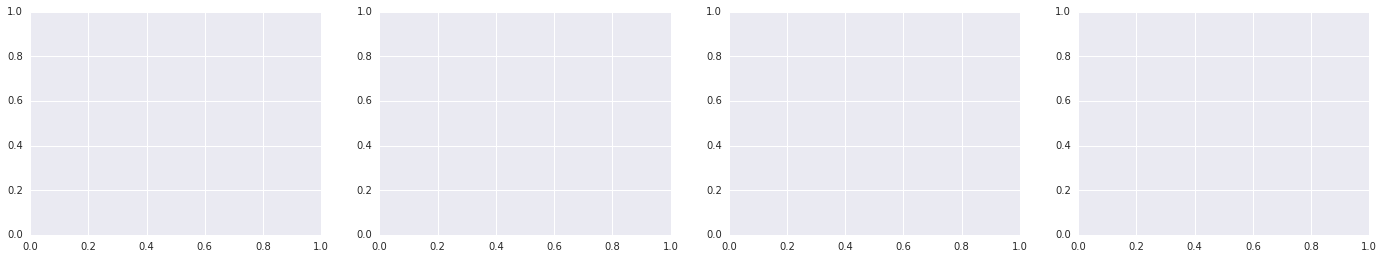

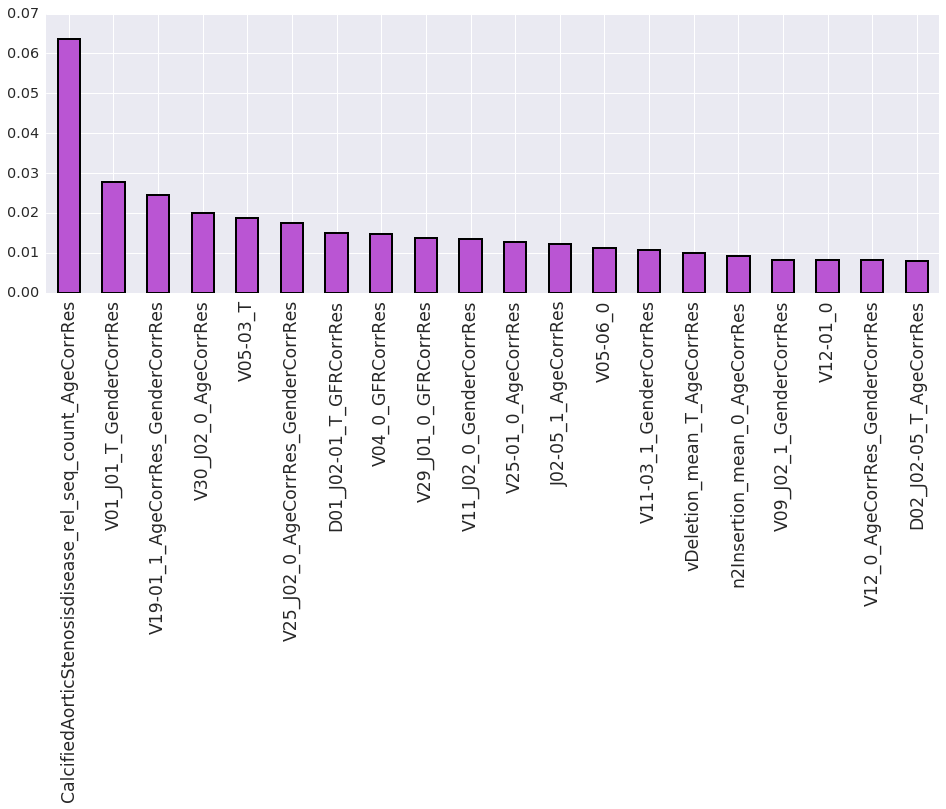

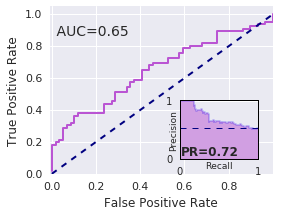

Prediction round is over
all predictions are done
None
None
None
('phen:', 'Known CAD')
('task:', 'class')
('featureSelectionMethod_list', [None])
BD
BD950    0.0
BD951    0.0
BD952    0.0
BD953    0.0
BD955    0.0
Name: Known CAD, dtype: float64
('X SHAPE:', (125, 658))
('y shape:', (125,))
Known CAD
('klist:', [10])
('featureSelectionMethod_list:', [None])
('klist:', [10])
('featureSelectionMethod_list:', [None])
None
0
fraction of 1s in train set=0.324324324324
fraction of 1s in test set=0.357142857143
no features were selected
1
fraction of 1s in train set=0.330357142857
fraction of 1s in test set=0.307692307692
no features were selected
2
fraction of 1s in train set=0.330357142857
fraction of 1s in test set=0.307692307692
no features were selected
3
fraction of 1s in train set=0.330357142857
fraction of 1s in test set=0.307692307692
no features were selected
4
fraction of 1s in train set=0.327433628319
fraction of 1s in test set=0.333333333333
no features were selected
5
fraction 

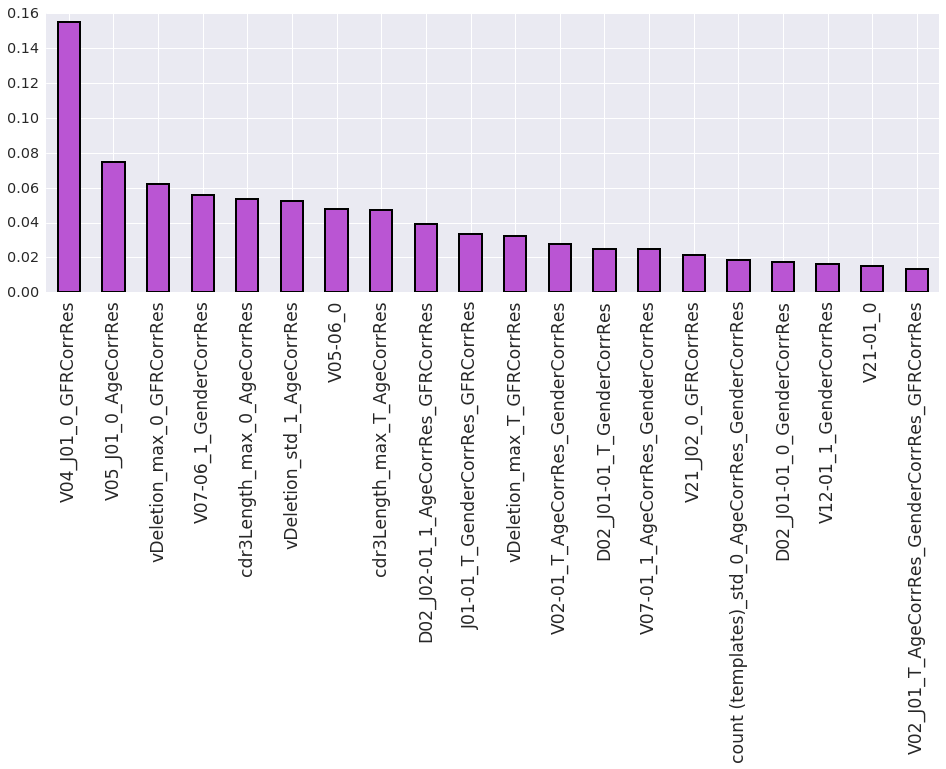

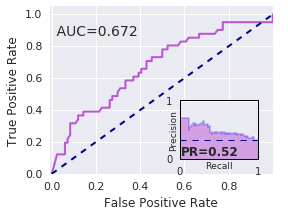

Prediction round is over
all predictions are done
None
None
None
('phen:', 'Maximal Troponin')
('task:', 'reg')
('featureSelectionMethod_list', ['usingModel'])
BD
BD950    3436.0
BD951    2465.0
BD952     185.0
BD953    1036.0
BD955     299.0
Name: Maximal Troponin, dtype: float64
('X SHAPE:', (121, 658))
('y shape:', (121,))
Maximal Troponin
('klist:', [200])
('featureSelectionMethod_list:', ['usingModel'])
('klist:', [200])
('featureSelectionMethod_list:', ['usingModel'])
usingModel
0
selected features are:
['D02_J01-05_0', 'V02-01_0_AgeCorrRes_GenderCorrRes', 'V02_J02_0_AgeCorrRes_GenderCorrRes', 'D01_J01-04_0_GFRCorrRes', 'D01_J01-02_0_GenderCorrRes', 'D01_J01-03_1', 'D01_J01-06_0_AgeCorrRes', 'D01_J02-06_0', 'V12-02_1', u'LCMV_rel_cum_freq(perc)', 'V02-01_T_AgeCorrRes_GenderCorrRes', u'HIV_rel_cum_freq(perc)', 'D02_J01-05_T', 'V12-01_0', 'D02_J01-03_1', 'V07-04_0_GenderCorrRes', 'V07-04_T', 'V07-03_0_GenderCorrRes', 'D02_J02-05_0_AgeCorrRes_GFRCorrRes', 'D01_J02-06_T_GenderCorrRes

X_train shape after feature selection using model is  109_200
X_val shape after feature selection using model is  12_200
2
selected features are:
['D01_J02-06_0', 'V02-01_0_AgeCorrRes_GenderCorrRes', 'D01_J01-02_0_GenderCorrRes', 'n2Insertion_std_0', 'D02_J01-05_0', 'D02_J01-05_T', 'D02_J02-05_0_AgeCorrRes_GFRCorrRes', u'CMV_rel_cum_freq(perc)', 'D01_J01-04_0_GFRCorrRes', 'n2Insertion_max_1_GenderCorrRes', 'V06-08_1', 'V04-02_0', 'D02_J02-06_0', 'J01-05_0', 'J02-04_T_GenderCorrRes', u'totalAnnotateSeqs_AgeCorrRes_GenderCorrRes_GFRCorrRes', u'LCMV_rel_cum_freq(perc)', 'V05-06_1', 'V07-04_0_GenderCorrRes', u'DENV_rel_seq_count_AgeCorrRes', u'HomoSapiens_rel_cum_freq(perc)', 'V05-06_T_AgeCorrRes', 'V02-01_T_AgeCorrRes_GenderCorrRes', 'frequencyCount (%)_max_1_AgeCorrRes_GenderCorrRes', 'D01_J01-04_T_AgeCorrRes_GenderCorrRes_GFRCorrRes', u'HIV_rel_cum_freq(perc)', 'V07_J02_0', 'V12-02_1', u'EBV_rel_seq_count', 'V07_T_AgeCorrRes', 'V14_J01_T_GFRCorrRes', 'count (templates)_max_0_GenderCorrR

X_train shape after feature selection using model is  109_200
X_val shape after feature selection using model is  12_200
4
selected features are:
['V02_J02_0_AgeCorrRes_GenderCorrRes', 'V02-01_0_AgeCorrRes_GenderCorrRes', 'D01_J01-04_0_GFRCorrRes', 'D02_J01-05_0', 'V12-01_0', 'D02_J02-05_0_AgeCorrRes_GFRCorrRes', 'V04-02_0', 'V02-01_T_AgeCorrRes_GenderCorrRes', 'V09_J01_1', 'V06_0', 'D01_J02-06_0', 'V25_J02_0_AgeCorrRes_GenderCorrRes', 'V07-04_0_GenderCorrRes', 'vDeletion_std_T_AgeCorrRes_GFRCorrRes', u'CMV_rel_cum_freq(perc)', 'V07-03_0_GenderCorrRes', 'V15-01_1_AgeCorrRes', 'D01_J01-02_0_GenderCorrRes', u'LCMV_rel_cum_freq(perc)', 'V07-04_T', u'Influenza_rel_cum_freq(perc)', 'V05-07_1', 'V15_J02_1_AgeCorrRes', 'V05-06_T_AgeCorrRes', 'cdr3Length_max_1_AgeCorrRes', 'D02_J02-04_1', 'D02_J01-05_T', 'V06-08_1', 'V12_J01_T', 'V12-05_0', u'Leukemia_rel_cum_freq(perc)', 'V23_J02_0_GFRCorrRes', 'D01_J02-07_T_AgeCorrRes_GenderCorrRes', 'V05-03_0', 'V06_J02_T_AgeCorrRes_GenderCorrRes', 'D02_J02

X_train shape after feature selection using model is  109_200
X_val shape after feature selection using model is  12_200
6
selected features are:
['J01-05_0', 'D01_J02-06_0', 'V25_J02_0_AgeCorrRes_GenderCorrRes', 'V02_J02_0_AgeCorrRes_GenderCorrRes', 'V02_J02_T_AgeCorrRes_GenderCorrRes', 'V02-01_0_AgeCorrRes_GenderCorrRes', 'D02_J02-05_0_AgeCorrRes_GFRCorrRes', u'LCMV_rel_cum_freq(perc)', 'J02-04_T_GenderCorrRes', 'V07-04_T', 'D01_J01-04_0_GFRCorrRes', 'D02_J02-06_0', 'V04-01_0_GFRCorrRes', 'J02-06_0', u'Carcinoma_rel_cum_freq(perc)_GFRCorrRes', 'D02_J01-05_0', 'V10-02_1_GenderCorrRes', 'V09_J01_1', 'V04-02_1', 'D02_J02-04_1', 'V06-04_T_AgeCorrRes_GenderCorrRes', 'V06-01_1', 'V12-02_T_GenderCorrRes', 'D01_J01-05_0_GFRCorrRes', 'vDeletion_std_T_AgeCorrRes_GFRCorrRes', 'n1Insertion_std_0', 'D02_J02-04_T', 'V20-01_0', 'V05-06_T_AgeCorrRes', 'D01_J02-07_T_AgeCorrRes_GenderCorrRes', 'n2Insertion_max_0', u'SIV_rel_seq_count_AgeCorrRes', 'V09_J02_0', u'LCMV_rel_seq_count', 'D01_J02-07_0_Gende

X_train shape after feature selection using model is  109_200
X_val shape after feature selection using model is  12_200
8
selected features are:
['V02_J02_0_AgeCorrRes_GenderCorrRes', 'D01_J01-04_0_GFRCorrRes', 'D02_J01-05_0', 'V02-01_0_AgeCorrRes_GenderCorrRes', 'D02_J02-04_1', 'V15_J02_0', 'V07-04_T', 'V25_J02_0_AgeCorrRes_GenderCorrRes', 'vDeletion_std_T_AgeCorrRes_GFRCorrRes', 'V12-01_0', 'V10-02_T_GenderCorrRes', 'V01-01_1', 'D02_J02-05_1_AgeCorrRes', 'D02_J01-03_1', 'V06-06_1_GFRCorrRes', 'V23_J02_0_GFRCorrRes', 'D01_J02-06_0', 'n2Insertion_std_1', 'V29_J02_0_GenderCorrRes', 'V02-01_1_AgeCorrRes_GenderCorrRes', u'LCMV_rel_cum_freq(perc)', 'V07-08_1_AgeCorrRes', 'V04-02_0', 'J02-06_0', 'D02_J02-05_0_AgeCorrRes_GFRCorrRes', 'V16_J02_1', 'V05-04_0', 'V07-01_T_AgeCorrRes_GenderCorrRes', 'D01_J02-07_T_AgeCorrRes_GenderCorrRes', u'DiabetesType1_rel_seq_count', 'V11-03_1_GenderCorrRes', 'J02-05_1_AgeCorrRes', 'D01_J02-06_1_GenderCorrRes', 'V07_J02_0', 'V20_J02_T', 'V06-06_0', 'V05_J02_

X_train shape after feature selection using model is  109_200
X_val shape after feature selection using model is  12_200
done with CV...
********
('YName:', u'Maximal Troponin', 'model:', <class 'xgboost.sklearn.XGBRegressor'>, 'k:', 200, 'featureSelectionMethod', 'usingModel')
('model params', ',n_estimators:100,num_threads:2,reg_alpha:10,bagging_seed:3,bagging_fraction:0.5,learning_rate:0.05,bagging_freq:1,reg_lambda:1,gamma:1,max_depth:3')
********
('sum_importances_shape:', (10, 658))


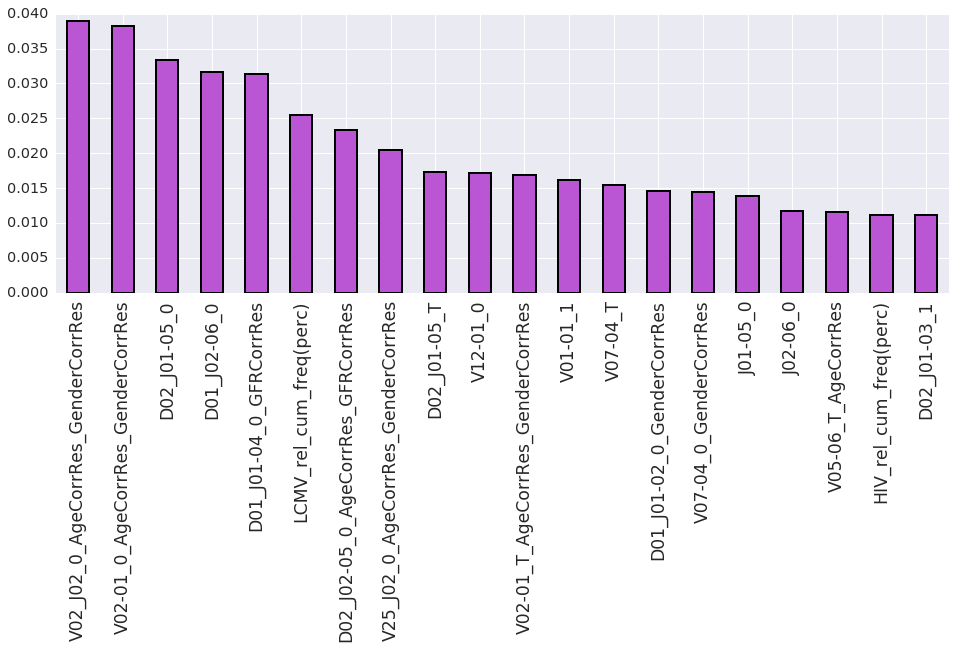

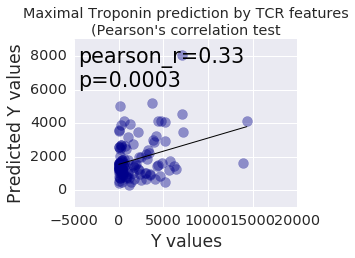

Prediction round is over
all predictions are done
Annotation(0.02,0.96,u'pearson_r=0.33\np=0.0003')
0.3258885777035534
0.0002646330938470905
('phen:', 'GRACE Score')
('task:', 'reg')
('featureSelectionMethod_list', ['usingModel'])
BD
BD950    90.0
BD951    82.0
BD952    91.0
BD953    95.0
BD955    99.0
Name: GRACE Score, dtype: float64
('X SHAPE:', (125, 658))
('y shape:', (125,))
GRACE Score
('klist:', [20])
('featureSelectionMethod_list:', ['usingModel'])
('klist:', [20])
('featureSelectionMethod_list:', ['usingModel'])
usingModel
0
selected features are:
['V25_J02_1_AgeCorrRes', 'D01_J02-04_0_AgeCorrRes_GenderCorrRes', 'PC9', 'PC4', 'V06-04_0', 'J02-06_T_GenderCorrRes', 'V30_J02_1_AgeCorrRes', 'V11-02_T_AgeCorrRes_GenderCorrRes', 'V29_J01_1', 'J01-01_0_GenderCorrRes_GFRCorrRes', 'V05-06_1', 'd3Deletion_std_0_AgeCorrRes', 'PC7', 'V06-07_T', 'berger_aa_1_AgeCorrRes_GenderCorrRes', 'V02-01_0_AgeCorrRes_GenderCorrRes', 'n2Insertion_std_0', 'V05-07_1', 'V06-08_T', 'D02_J02-03_1_GenderCor

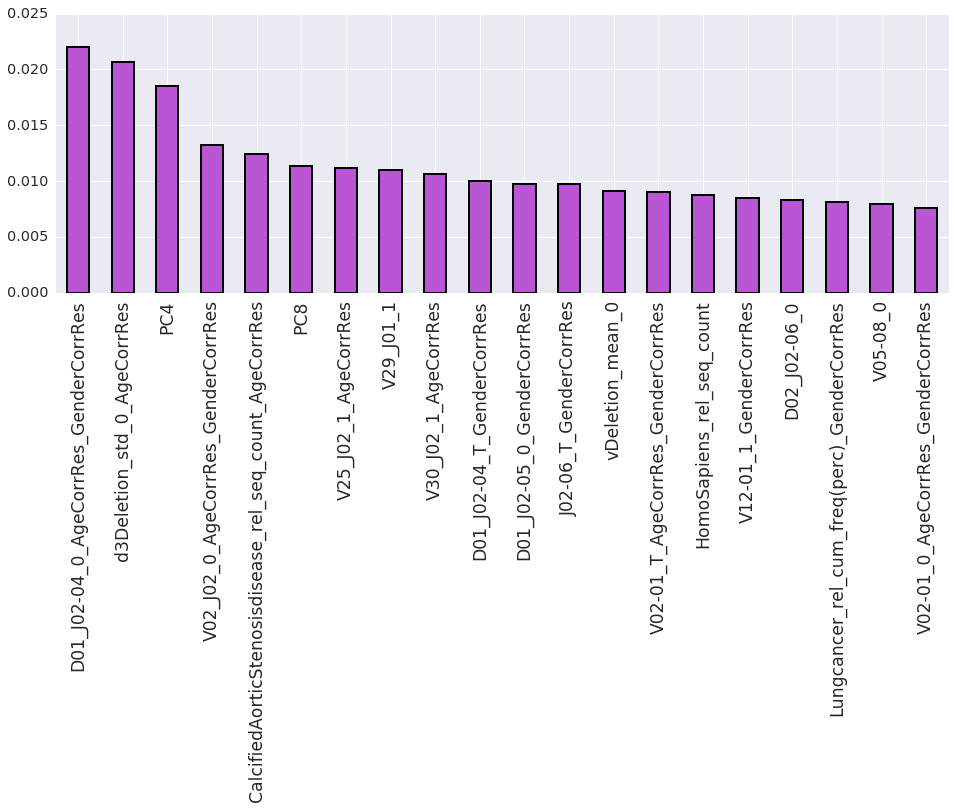

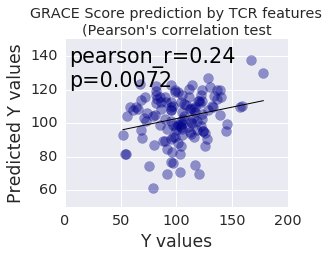

Prediction round is over
all predictions are done
Annotation(0.02,0.96,u'pearson_r=0.24\np=0.0072')
0.23936616682083092
0.007177168212261289


In [4]:
phenList=[('Admission Statins',XGBClassifier,'XGBClassifier',20,'usingModel','class',{'n_estimators':100,'num_threads':2,
                                                                              'reg_alpha':0,
                                                              'reg_lambda':1,'bagging_seed':3,'bagging_freq':1,
                                                              'learning_rate':0.05,'bagging_fraction':0.5,'max_depth':5,
                                                              'gamma':0}),
           ('Known CAD',XGBClassifier,'XGBClassifier',10,None,'class',{'n_estimators':100,'num_threads':2,'reg_alpha':10,
                                                        'reg_lambda':1,'bagging_seed':3,'bagging_freq':1,'learning_rate':0.05,
                                                       'bagging_fraction':0.5,'max_depth':3,'gamma':1}),
         ('Maximal Troponin',XGBRegressor,'XGBRegressor',200,'usingModel','reg',{'n_estimators':100,'num_threads':2,
                                                        'reg_alpha':10,'reg_lambda':1,'bagging_seed':3,'bagging_freq':1,
                                                        'learning_rate':0.05,'bagging_fraction':0.5,'max_depth':3,
                                                                                 'gamma':1}),
         ('GRACE Score',XGBRegressor,'XGBRegressor',20,'usingModel','reg',{'n_estimators':1000,'num_threads':2,
                                                        'reg_alpha':10,'reg_lambda':1,'bagging_seed':3,'bagging_freq':1,
                                                        'learning_rate':0.05,'bagging_fraction':0.5,'max_depth':5,
                                                                           'gamma':1})]
#         

#get dfs:
#new X: includes all TCR features, corrected for age and Gender
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined' %MyPath
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
PNP530Cardio126=PNP530+Cardio126
resultFolder='%s/%s' %(posterFolder,'fig4')

f1='%s/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10__withRels_AgeGenderGFRCorr.dat' %MyPath
X_corrected_withRels_cardio126=pd.read_pickle(f1).loc[PNP530Cardio126,:]

f2='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenAllInfo_withDummies.xlsx' %MyPath
phenDF=pd.read_excel(f2).set_index('BD')

X=X_corrected_withRels_cardio126.copy()
Xname='X_AgeGenderGFRCorrected_withRels_Cardio126'


fig4,axes4=plt.subplots(nrows=1,ncols=4,figsize=(24,4))

for n,phenItem in enumerate(phenList):
    ax=axes4.flatten()[n]
    phen=phenItem[0]
    model=phenItem[1]
    modelName=phenItem[2]
    k_list=[phenItem[3]]
    featureSelectionMethod_list=[phenItem[4]]
    task=phenItem[5]
    model_params=phenItem[6]
    
    print ('phen:',phen)
    print ('task:',task)
    print ('featureSelectionMethod_list',featureSelectionMethod_list)

    
    binaryPhenDF=phenDF[phen]
    print binaryPhenDF.head()
    
    Y=binaryPhenDF
    Y=Y.dropna()
    X=X.loc[Y.index,:]
    
    print ('X SHAPE:', X.shape)
    print ('y shape:',Y.shape)
    
    print phen
    
    Resdf,fig1tuple,fig2tuple=run_old_classification(X,Xname, Y, k_list,model, modelName,model_params,task,
                                       resultFolder,featureSelectionMethod_list,fig2toAnnotate=True)
    ax2=fig2tuple[1]
    text2=fig2tuple[2]
    r2=fig2tuple[3]
    p2=fig2tuple[4]
    
    print text2
    print r2
    print p2
    
    if text2 is not None:
        text2.remove()
        if p2<0.001:
            p2='<0.001'
        else:
            p2='=%s' %round(p2,3)
        ax2.annotate("r=%.2f,p%s" %(r2,p2),  xy=(0.02, 0.96), xycoords='axes fraction', fontsize='x-large',
            horizontalalignment='left', verticalalignment='top',color='black')
    plt.show()
    
    



In [ ]:
tuple([1,2])